In [146]:
import os, sys, glob
os.environ['R_HOME'] = sys.exec_prefix + '/lib/R/'
import numpy as np
import scanpy as sc
import scFates as scf

In [147]:
fn = glob.glob('../*/*/*/GSE136689_adata_processed.h5ad')[0]
adata = sc.read_h5ad(fn)

In [148]:
adata

AnnData object with n_obs × n_vars = 10097 × 17462
    obs: 'Stages', 'Clusters', 'Type', 'LineageAnnotations', 'celltype'
    var: 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'Stages_colors', 'celltype_colors', 'diffmap_evals', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

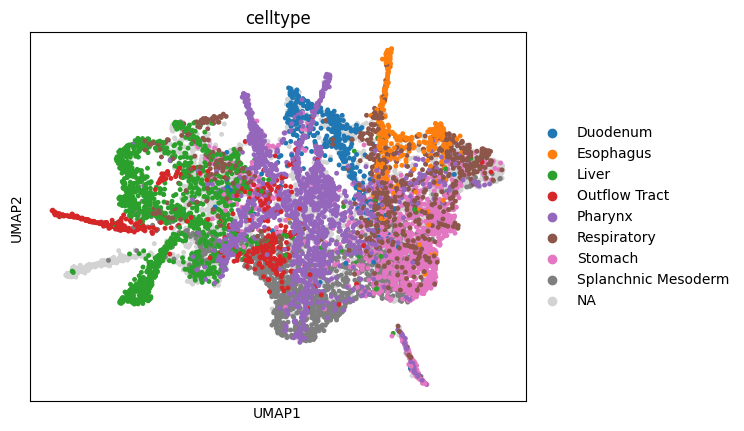

In [149]:
sc.pl.umap(adata, color = 'celltype', size = 50)

In [150]:
adata = adata[adata.obs.celltype == 'Splanchnic Mesoderm']

In [151]:
adata

View of AnnData object with n_obs × n_vars = 1379 × 17462
    obs: 'Stages', 'Clusters', 'Type', 'LineageAnnotations', 'celltype'
    var: 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'Stages_colors', 'celltype_colors', 'diffmap_evals', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [152]:
sc.tl.leiden(adata, resolution = .5)

/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/scanpy/tools/_leiden.py:198: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_added] = pd.Categorical(


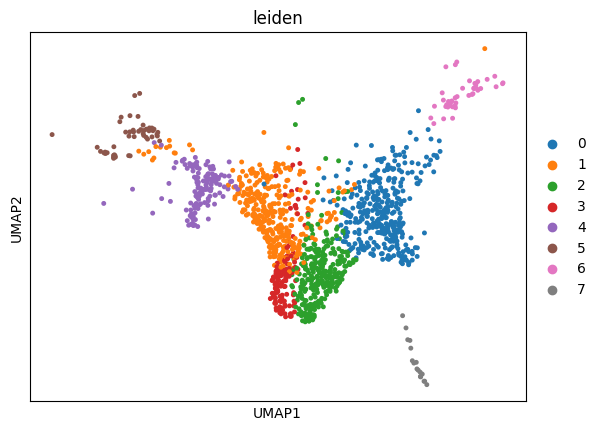

In [153]:
sc.pl.umap(adata, color = 'leiden', size = 50)

In [154]:
remove = np.arange(4, 8).astype(str)
adata = adata[~adata.obs.leiden.isin(remove)]

In [155]:
adata

View of AnnData object with n_obs × n_vars = 1144 × 17462
    obs: 'Stages', 'Clusters', 'Type', 'LineageAnnotations', 'celltype', 'leiden'
    var: 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable'
    uns: 'Stages_colors', 'celltype_colors', 'diffmap_evals', 'log1p', 'neighbors', 'pca', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_diffmap', 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

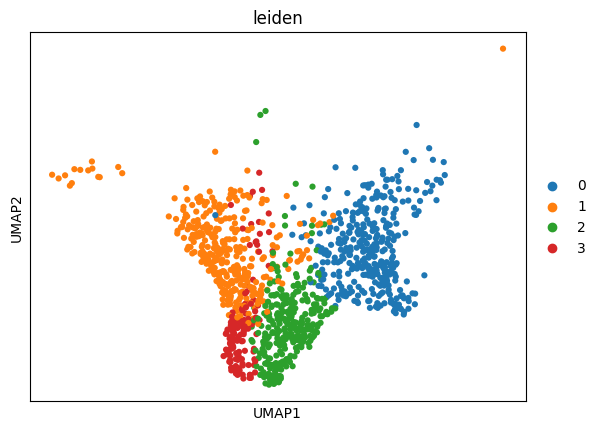

In [156]:
sc.pl.umap(adata, color = 'leiden', size = 80)

In [157]:
sc.pp.neighbors(adata, n_neighbors = 100, use_rep = 'X_diffmap')

In [158]:
sc.tl.umap(adata)

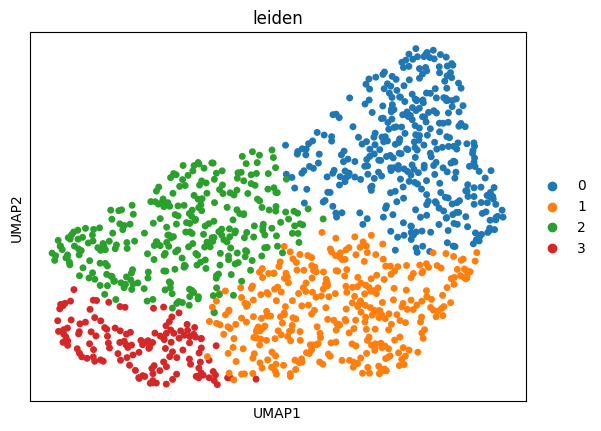

In [159]:
sc.pl.umap(adata, color = 'leiden', size = 100)

inferring a principal curve --> parameters used 
    15 principal points, mu = 100, lambda = 0.01
    finished (0:00:00) --> added 
    .uns['epg'] dictionnary containing inferred elastic curve generated from elpigraph.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'], coordinates of principal points in representation space.


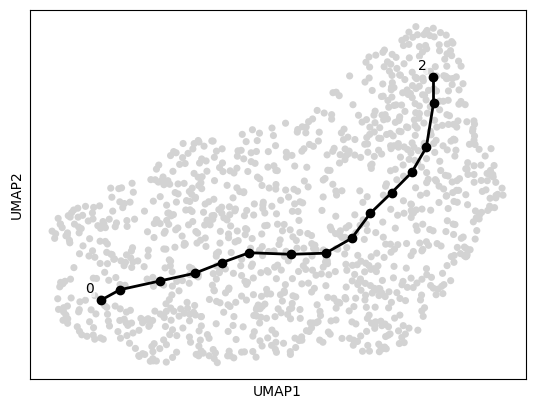

In [160]:
scf.tl.curve(adata, Nodes = 15, epg_lambda = .01, epg_mu = 100, use_rep = 'X_umap', plot = True, basis = 'umap')

In [161]:
scf.tl.root(adata, 0)

node 0 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [162]:
scf.tl.pseudotime(adata)

projecting cells onto the principal graph
    finished (0:00:00) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


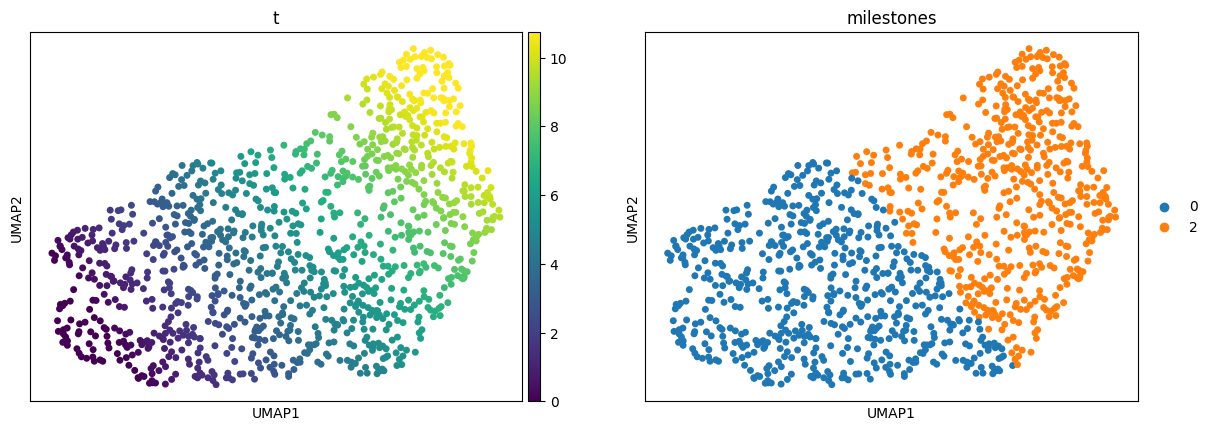

In [163]:
sc.pl.umap(adata, color = ['t', 'milestones'], size = 100)

/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


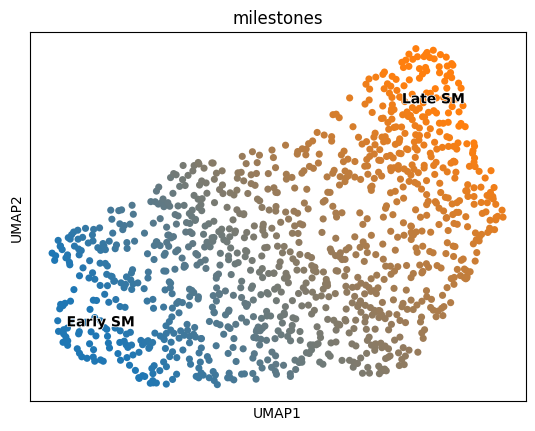

In [164]:
scf.tl.rename_milestones(adata, new = {'0' : 'Early SM', '2' : 'Late SM'})
scf.pl.milestones(adata, basis = 'umap', annotate = True)

In [165]:
scf.tl.test_association(adata, n_jobs = 8)

test features for association with the trajectory
    single mapping : 100%|██████████| 17462/17462 [02:34<00:00, 113.36it/s]
    found 18 significant features (0:02:34) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [166]:
scf.tl.test_association(adata, reapply_filters = True, A_cut = .4)

reapplied filters, 121 significant features


In [167]:
scf.tl.fit(adata, n_jobs = 8)

fit features associated with the trajectory
    single mapping :   0%|          | 0/121 [00:00<?, ?it/s]

    single mapping : 100%|██████████| 121/121 [00:02<00:00, 48.67it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:02) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


Clustering features using fitted layer
    finished (0:00:00) --> added 
    .var['clusters'] identified modules.
Cluster 0: 32 Genes
Cluster 1: 32 Genes
Cluster 2: 32 Genes
Cluster 3: 15 Genes
Cluster 4: 10 Genes


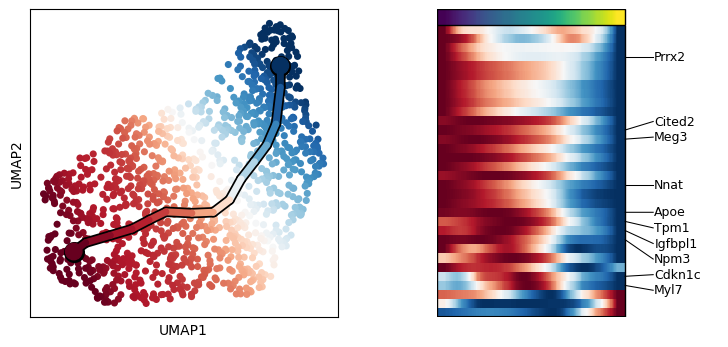

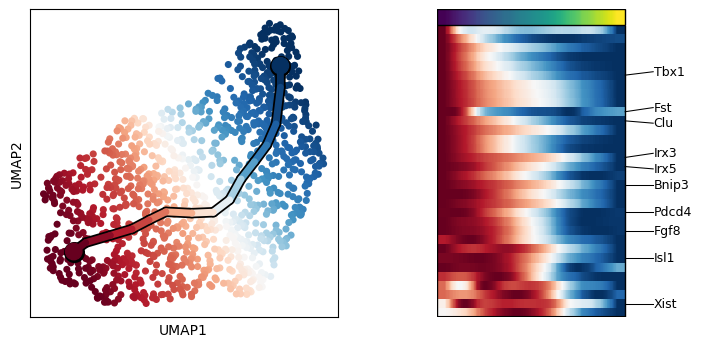

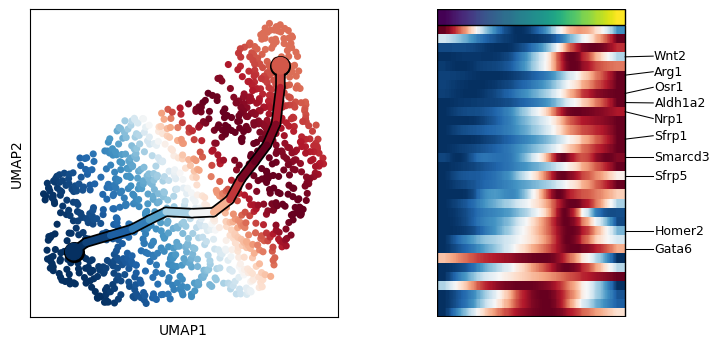

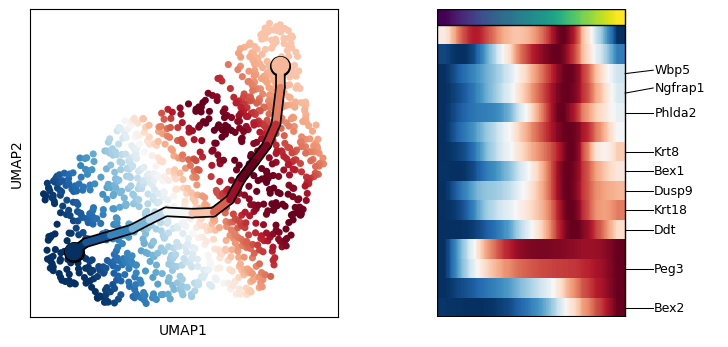

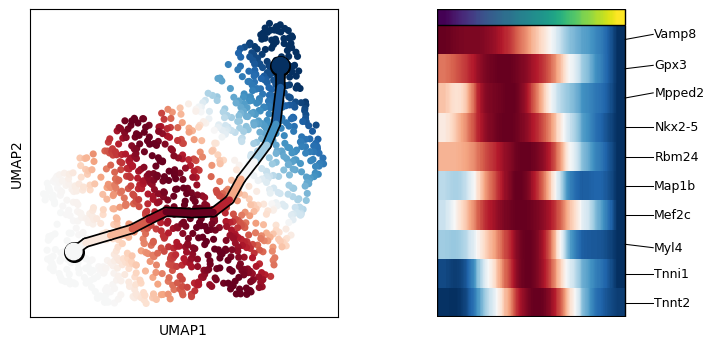

In [172]:
scf.tl.cluster(adata, resolution = 1.2)
for clus in sorted(adata.var.clusters.unique()):
    clus_msk = (adata.var.clusters == clus)
    clus_features = adata.var_names[clus_msk]
    print(f'Cluster {clus}: {clus_features.size} Genes')
    scf.pl.trends(adata, features = clus_features, basis = 'umap')

early: 74 Genes
late: 47 Genes


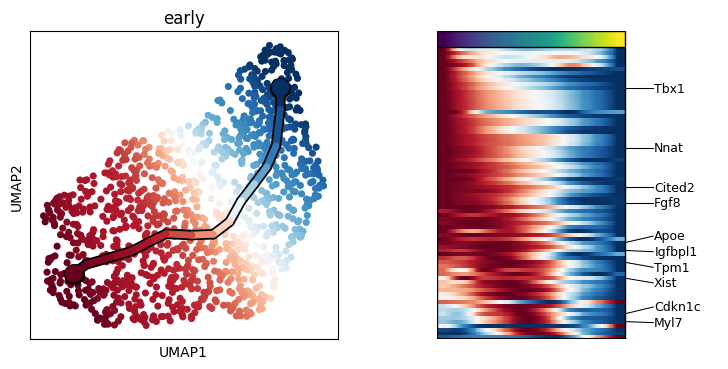

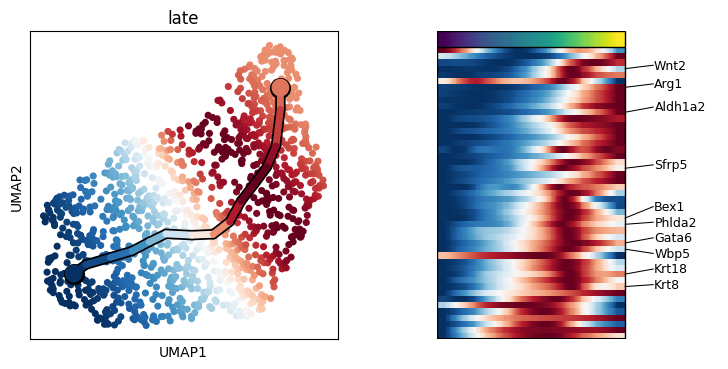

In [173]:
signatures_dict = {
    '0' : 'early',
    '1' : 'early',
    '2' : 'late',
    '3' : 'late',
    '4' : 'early'
    }
adata.var['signature'] = adata.var.clusters.map(signatures_dict).astype('category')
os.mkdir('results/GSE136689')
for clus in adata.var.signature.unique():
    clus_msk = (adata.var.signature == clus)
    clus_features = adata.var_names[clus_msk]
    print(f'{clus}: {clus_features.size} Genes')
    scf.pl.trends(adata, features = clus_features, basis = 'umap', title = clus)
    np.savetxt(f'results/GSE136689/{clus}.txt', clus_features, fmt = '%s')